# **Tutorial 10**

In [51]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

**Given Data**

In [52]:
m = 0.1                       # mass
theta = (15*np.pi)/180        # angle 
T_max = 2                     # max tension in the cables
p_init = np.array([0, 0])     # initial position
p_dest = np.array([10, 2])    # destination position
g = np.array([0, -9.8])       # acceleration due to gravity
h = 0.1                       # timestep

left_comp = np.array([[-np.sin(theta), np.cos(theta)]])     # components of left cable
right_comp = np.array([[np.sin(theta), np.cos(theta)]])     # components of right cable

**Bisection Method to find optimal time k***

In [53]:
L = 10       # lower bound
U = 50       # upper bound

# Since k is a integer we can apply bisection method till the difference between
# lower bound and upper bound is 1

while(U-L != 1):

  k = int((L+U)/2)

  T_left = cp.Variable((1, k-1))      # tension in left cable
  T_right = cp.Variable((1, k-1))     # tension in right cable

  # total force on the load
  # by using np.tile on g we can define F directly without running loop from 1 to k-1
  # it make k-1 copies of g as a matrix
  F = left_comp.T @ T_left  + right_comp.T @ T_right + m*np.tile(g, (k-1, 1)).T

  p = cp.Variable((2, k))             # position of load in R2 plane as (p_x, p_y)
  v = cp.Variable((2, k))             # velocity of load in R2 plane as (v_x, v_y)


  # p[:,0] = p(x_0, y_0) and p[:,k-1] = p(x_k-1, y_k-1)
  constraints = [T_left >=0, T_left <= T_max, T_right >=0, T_right <= T_max]
  constraints += [p[:,0] == p_init, p[:,k-1] == p_dest, v[:,0] == 0, v[:,k-1] == 0]

  for i in range(0, k-1):
    constraints += [v[:,i+1] == v[:,i] + (h/m)*F[:,i]]   # v_i+1 = v_i + (h/m)F_i
    constraints += [p[:,i+1] == p[:,i] + h*v[:,i]]       # p_i+1 = p_i + hv_i

  objective = cp.Minimize(k)

  prob = cp.Problem(objective, constraints)
  prob.solve()

  # To check the feasibility
  if prob.status == 'optimal':
    U = k

    # To store optimal p and T
    optimal_T_left = T_left.value
    optimal_T_right = T_right.value
    optimal_p = p.value
    
  else:
    L = k

print("The minimum time k⋆ = ", k)  

The minimum time k⋆ =  34


**Plots**

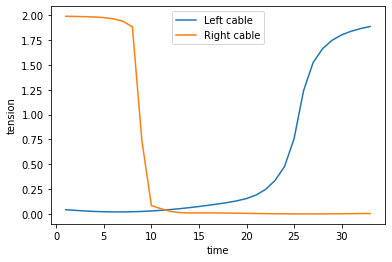

In [54]:
t = list(range(1, k))         # time
plt.plot(t, optimal_T_left.T, label = 'Left cable')
plt.plot(t, optimal_T_right.T, label = 'Right cable')
plt.xlabel('time')
plt.ylabel('tension')
plt.legend()
plt.show()

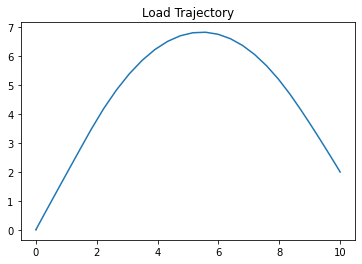

In [55]:
# Trajectory in R2 plane (p_x, p_y)
plt.plot(optimal_p[0,:], optimal_p[1,:])
plt.title('Load Trajectory')
plt.show()

Does the load move along the line segment between p_init and p_des?

`Ans` : No, as it is clear from the trajectory followed by load that it does not move in a straight line from initial position to final position.